# Breakout: Model Validation

Our previous [breakout](03.2-Machine-Learning-Breakout.ipynb) involved classification of RR Lyrae stars, and regression for photometric redshifts.
For this session, we will revisit these problems using what we've learned about validation. The overall task is this: **use cross-validation to select the best models for these data.**

## Preliminaries

Again, we'll start with some boilerplate imports and setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

## RR Lyrae

Just as we did in the previous breakout, we'll take a look at the RR Lyrae data that we'll be classifying:

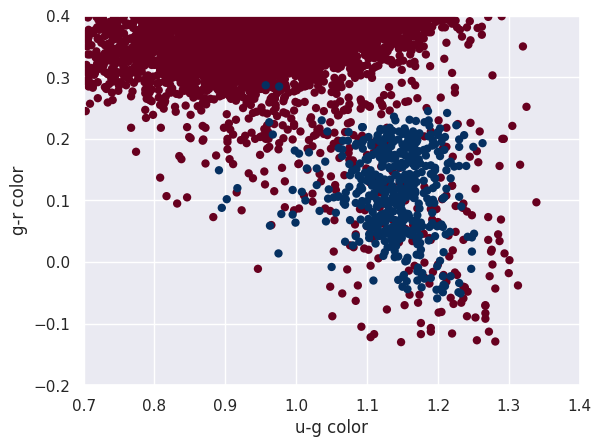

In [3]:
from astroML.datasets import fetch_rrlyrae_combined
from sklearn.model_selection import train_test_split

X, y = fetch_rrlyrae_combined()

N_plot = 5000
plt.scatter(X[-N_plot:, 0], X[-N_plot:, 1], c=y[-N_plot:],
            edgecolors='none', cmap='RdBu')
plt.xlabel('u-g color')
plt.ylabel('g-r color')
plt.xlim(0.7, 1.4)
plt.ylim(-0.2, 0.4);

Now we want to fit an **SVM** classifier to this data, but adjust the SVM parameters to find the optimal model.
The Support Vector Classifier, ``SVC``, has several hyperparameters which affect the final fit:

- ``kernel``: can be ``'rbf'`` (radial basis function) or ``'linear'``, among others. This controls whether a linear or kernel fit is used
- ``C``: the SVC penalty parameter
- ``gamma``: the kernel coefficient for ``rbf``

You can see more using IPython's help feature:

In [4]:
from sklearn.svm import SVC
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

### Classification breakout questions

1. Using ``sklearn.cross_validation.cross_val_score``, explore various values for these parameters. Recall the discussion from the [previous breakout](03.2-Machine-Learning-Breakout.ipynb). What is the best **completeness** you can obtain? What is the best **precision**? 

2. Use the concept of **validation curves** and **learning curves** to determine how this could be improved. Would you expect more training samples to help? More features for the current samples? A more complicated model?

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .

## Photometric Redshifts

We'll now do a similar validation exercise using the photometric redshift problem on SDSS dr7 quasars using ``sklearn.ensemble.RandomForestRegressor``. The parameters you should explore are
``n_estimators``, ``criterion``, and ``max_depth``. You can read more about these with IPython's help functionality:

In [7]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

Here's the code again to download the data:

In [8]:
from astroML.datasets import fetch_sdss_specgals

data = fetch_sdss_specgals()

# put magnitudes in a matrix
feature_names = ['modelMag_%s' % f for f in 'ugriz']
X = np.vstack([data[f] for f in feature_names]).T
y = data['z']

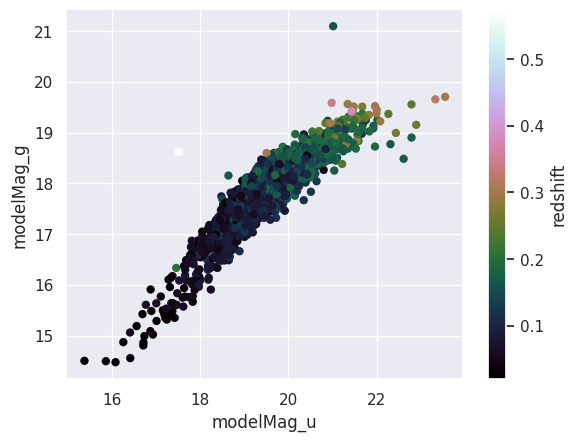

In [9]:
# Plot some magnitudes for the first two thousand points
i, j = 0, 1
N = 2000
plt.scatter(X[:N, i], X[:N, j], c=y[:N],
            edgecolor='none', cmap='cubehelix')
plt.xlabel(feature_names[i])
plt.ylabel(feature_names[j])
plt.colorbar(label='redshift');

### Photoz Breakout Questions

Think about what you know about the random forest.

1. Think about how over-fitting and under-fitting might affect the results: how do you expect ``n_estimators`` and ``max_depth`` to affect these? Can you make some learning curve plots which confirm this expectation?

2. What is the best mean squared error you can find for this data? (use ``sklearn.metrics.mean_squared_error``)

3. Often for photometric redshifts, one is not concerned with mean squared error, but with minimizing **catastrophic outliers**: that is, points for which the redshift is off by (say) 0.5 or more. Can you find a combination of model parameters which leads to the lowest catastrophic outlier rate? (Note that you can provide a ``scoring`` function to ``sklearn.cross_validation.cross_val_score``.

4. Create some learning curves for this data. If you wanted to improve random forest photometric redshift results, would it be more fruitful to:
   A. Gather more training samples (i.e. more galaxies with spectroscopic redshifts)
   B. Gather more features (i.e. more photometric observations for each existing sample)

In [10]:
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

    .